## Logistic Regression

Linear Regression can output any values, but there are scenarios where the expected output has to be between 0 to 1. For instance, in classification task, you would want to calculate the probability that the new sample belongs to a particular class. And probabilities have to be between 0 and 1, which Linear Regression doesn't respect. We can use the same gradient descent algorithm and modify the loss function a little bit to reflect the change in output to make squash at between 0 and 1. 

One more reason why Linear Regression is not suitable is because it assumes that the data (residuals) is normally distributed (See assumptions of Linear Regression). And this assumption is not satisfied when the data is binary (in classification problem). 

Another reason for the failure of Linear Regression is, probability is often times not linear. Imagine a "U" shape where the probabilities are very high and very low at the extreme values of x. 

One such function is the sigmoid activation. We'll see how the function is derived, and what are the properties of sigmoid.
In a nutshell -- Linear Regression fits a straight line to the data. Logistic Regression fits a sigmoid to the data. 

 

### Sigmoid Activation

Our requirement is $$0 \le h_\theta(x) \le 1$$

For starters, let's design a function that always outputs a positive value (Remember probabilities are always non-negative). Consider the Euler's number $e$, $e$ raised to anything will always be positive. This function is called __Natural Exponentiation Function__. 

### Intuitive explanation of Sigmoid
#### Why use $e^x$ and not something else ? like $2^x$ or $45^x$ ?
Exponential functions have nice mathematical properties, few of them are as follows:

1. Exponential functions (Sigmoid) introduce non-linearity. 
2. Exponential functions are differentialble, and the easy to differentiate
3. Exponential functions are convex, therefore have only global minimum, hence it's easy to optimize. 

Now that we have positive values, the next step is to make it in less than 1 (Remember, probabilities are always less than 1). Now, for any positive number if we divide the same number + 1, the output will always be less than 1. So out function becomes:

 $$\frac{e^x}{e^x + 1}$$

Now we have the desired properties, the function is never lesser than 0 nor greater than one. Dividing the above equation by $e^x$, we have

 $$\sigma(x) = \frac{1}{1 + e^{-x}}$$
 
 
### Mathematical derivation of Sigmoid / Logistic Regression

Logistic Regression relies on the principle of Maximum Likelihood Estimation (MLE). Intuitive definition of what MLE does is: Given certain data, there are multiple functions that can model it. Each of the functions tries to replicate what the underlying process does. MLE tries to find which of the function represents the underlying process accurately. Following are some definitions before proceeding to the derivation.

#### Odds
Odds are nothing but the ratio of an event occuring on the event not-occuring and is given by (assuming Bernoulli trials)

$${\text Odds} = \frac {\text P (occuring)} {\text P (not \ occuring)} = \frac {p} {1 - p}$$


#### Logit 
We have to represent the outcome of the function as probability. So by taking odds, we assign the outcome as a probability. We take the log of it for mathematical conviniece (later by inverting it we will have sigmoid)

$${\text logit(p)} = \ln \frac{p}{1 - p}$$

#### Sigmoid
The inverse of Logit function is the Sigmoid function.


#### Principle
The principle of Logistic Regression is to maximize the log likelihood. The linear combination of data is represented as probability using the logit function. 

Linear Regression representation was: 

$$h_{\theta}\left(x\right)=\theta_0+\theta_1\cdot x_1+\theta_2\cdot x2+....$$

In Logistic Regression, we assign a probability to it:

$$ h_{\theta}\left(y=1\ \vert \ x\right)=\theta_0+\theta_1\cdot x_1+\theta_2\cdot x2+.... $$

Above equation is read as: probability y equals 1, given x. This is also called as conditional probability. Now we represent this using logit.

$$ \ln\left(\frac{p}{1-p}\right)=h_{\theta}\left(x\right)$$

Taking exponential both sides, 
$$\frac{p}{1-p}= e^{h_{\theta}\left(x\right)}$$

After some algebra,  we have 
$$p=\frac{1}{1+e^{-h_{\theta}\left(x\right)}}$$

Which is the definition of sigmoid 


### Gradient of sigmoid function


$
\begin{align}
\dfrac{d}{dx} \sigma(x) &= \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right] \\
&= \dfrac{d}{dx} \left( 1 + \mathrm{e}^{-x} \right)^{-1} \\
&= -(1 + e^{-x})^{-2}(-e^{-x}) \\
&= \dfrac{e^{-x}}{\left(1 + e^{-x}\right)^2} \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{e^{-x}}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( \dfrac{1 + e^{-x}}{1 + e^{-x}} - \dfrac{1}{1 + e^{-x}} \right) \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right) \\
&= \sigma(x) \cdot (1 - \sigma(x))
\end{align}
$

### Visualizing sigmoid

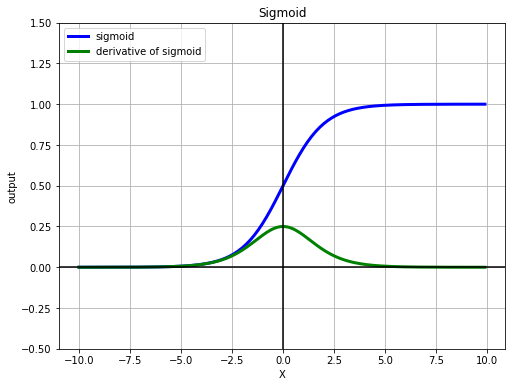

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

X = np.arange(-10, 10, 0.1)
fig = plt.figure(figsize=(8, 6))
plt.plot(X, sigmoid(X), label='sigmoid', c='blue', linewidth=3)
plt.plot(X, grad_sigmoid(X), label='derivative of sigmoid', c='green', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('X')
plt.grid(True)
plt.ylim([-0.5, 1.5])
plt.ylabel('output')
plt.title('Sigmoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

## Cost function and Optimization Objective for Logistic Regression

The objective function for logistic regression will be a little different. Instead of minimizing the sigmoid we'll differentiate the negative log of the sigmoid. We do this for a few reasons:
1. Math is easier, all the multiplications are converted to sums
2. Differentiation is easier
3. The function is smooth, hence differentiable.
4. Our probability values can be very low eg. 4e-45 which are messy to deal with, using log on them will convert the values to a more readable form. 
5. If we take only sigmoid, then the resulting function in non-convex function which will have local optimums. Hence, we log it to make it a convex function. 

Our loss function will be:
$$
\begin{equation}
    Cost(h_\theta(x), y)=
    \begin{cases}
        -log(h_\theta(x)), & \text{if}\ y=0 \\
        -log(1 - h_\theta(x)), & \text{if}\ y=1
    \end{cases}
\end{equation}
$$

Where, $h_\theta(x)$ is the sigmoid function
$$h_\theta(x) = \frac{1}{1 + e^{-x}}$$

Instead of writing two separate equations, we'll write it in one sigle form:

$$Cost(h_\theta(x), y) = -ylog(h_\theta(x)) - (1 - y)(log(1 - h_\theta(x)))$$

When y = 0, the left part of the equation automatically becomes 0. When y = 1 the right part of the equation automatically becomes 0. Hence, we have represented the same concept as above in a single equation. The same equation can also be obtained by the principle of __Maximum Likelihood Estimation__. 

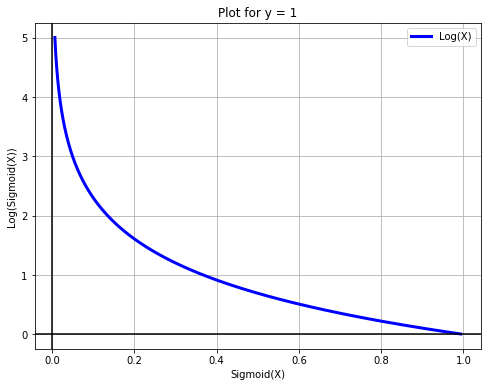

In [21]:
X = np.arange(-5, 5, 0.01)
fig = plt.figure(figsize=(8, 6))
plt.plot(sigmoid(X), -np.log(sigmoid(X)), label='Log(X)', c='blue', linewidth=3)
plt.legend()
plt.xlabel('Sigmoid(X)')
plt.grid(True)
plt.ylabel('Log(Sigmoid(X))')
plt.title('Plot for y = 1')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

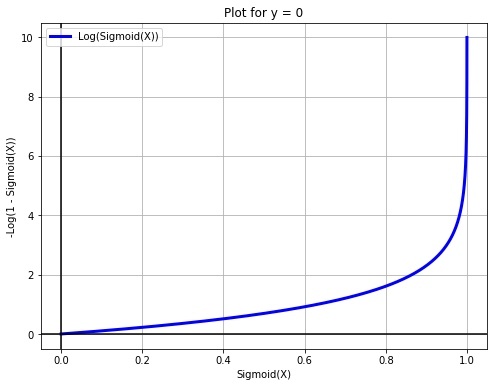

In [22]:
X = np.arange(-10, 10, 0.01)
fig = plt.figure(figsize=(8, 6))
plt.plot(sigmoid(X), -np.log(1 - sigmoid(X)), label='Log(Sigmoid(X))', c='blue', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('Sigmoid(X)')
plt.grid(True)
plt.ylabel('-Log(1 - Sigmoid(X))')
plt.title('Plot for y = 0')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

  \begin{equation}
    X=
    \begin{cases}
      0, & \text{if}\ a=1 \\
      1, & \text{otherwise}
    \end{cases}
  \end{equation}

## Limitations of Logistic Regression

### Linear Classifier
Despite using the sigmoid non-linearity, the logistic regression classifier is still a ***linear combination*** of the inputs and hence is a **linear classifier**. The interpretation of this while building a classifier is, the classifier will always be a straight line. So when the data is like this:

insert non-linearly separable data here
    
The classifier will output a straight line. 

image here

## Interpretation of Weights

In linear regression we have a simple interpretation. In the equation

$$h_{\theta}\left(x\right)=\theta_0+\theta_1\cdot x_1+\theta_2\cdot x2+....$$

The interpretation of the weight is: the change in $y$ by a unit change in $x$, given all the other $x$s remain constant. But this changes a little bit in Logistic Regression. 

We have:

$$ \ln\left(\frac{p}{1-p}\right)=h_{\theta}\left(x\right)=\theta_0+\theta_1\cdot x_1+...$$

In a way we can say that Logistic Regression is linear regression on log-odds. So the interpretations of weights now become: the amount of increase in log-odds by a unit change in an $x$ given other $x$s remain constant. 